# Tugas Project ML 👨‍💻👩‍💻

## 🙆‍♂️🙆‍♀️ Anggota Kelompok:
1. Agnes Triana Cyntianesa	24060120120021
2. Arifa Alif Malicha Khairunnisa	24060120120033
3. Dimas Wahyu Ardiyanto	24060120140159
4. Muhammad Hafizh Roihan	24060120130123
5. Vito Ahmad Husein	24060120140111
6. Zara Zetira Puti	24060120120030

## 🕵️‍♂️ Link Deskripsi Dataset
https://archive.ics.uci.edu/ml/datasets/seeds
## 👩‍🏫 Link Data Dataset
https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt
## 👨‍🚒 Alternative (Kaggle)
https://www.kaggle.com/datasets/rwzhang/seeds-dataset

## 📜 Deskripsi Singkat Dataset
##### Dataset ini adalah hasil penelitian terhadap 3 jenis varietas gandum yang berbeda:
- Kama
- Rosa
- Canadian

##### Masing-masing varietas terdapat 70 data yang dipilih secara acak dalam percobaan penelitian dengan menggunakan bantuan sinar-X yang tidak merusak dan alat pencitraan yang canggih.
\
##### Attribute Information:
1. area A,
2. perimeter P,
3. compactness C = 4*pi*A/P^2,
4. length of kernel,
5. width of kernel,
6. asymmetry coefficient
7. length of kernel groove.

\
##### ❗ All of these parameters were real-valued continuous.

## 📚 Install Library 
Khusus Jupyter Notebook

In [ ]:
pip install pandas
pip install seaborn
pip install -U scikit-learn scipy matplotlib
pip install numpy
pip install -U matplotlib
pip install tabulate

## 📚 Import Library 
Melakukan import library yang dibutuhkan dalam analisis, pembacaan dataset, reduksi dimensi, clustering, dan evaluasi

In [1]:
##### DATA ANALYSIS #####
"""
NumPy is a Python library used for working with arrays
"""
import numpy as np
"""
Pandas is a Python library for data analysis
"""
import pandas as pd
"""
Pickle can transform a complex object into a byte stream and it can transform the byte stream into an object 
with the same internal structure
"""
import pickle

################################################################################


##### CLUSTERING AND DIMENSIONALITY REDUCTION #####
"""
Pipeline is to assemble several steps that can be cross-validated together while setting different parameters
"""
from sklearn.pipeline import Pipeline
"""
Linear dimensionality reduction
"""
from sklearn.decomposition import PCA
"""
The KMeans class from the sklearn is a cluster module from the Scikit-learn library is used for k-means clustering
"""
from sklearn.cluster import KMeans

################################################################################


##### CLUSTERING EVALUATION #####
"""
The Silhouette Coefficient is a measure of how well samples are clustered with samples that are similar to themselves

"""
from sklearn.metrics.cluster import silhouette_score

"""
DB Index  score is defined as the average similarity measure of each cluster with its most similar cluster,
where similarity is the ratio of within-cluster distances to between-cluster distances
The minimum score is zero, with lower values indicating better clustering
"""
from sklearn.metrics import davies_bouldin_score

################################################################################


##### DATA VISUALIZATION #####
"""
matplotlib for data visualization
"""
import matplotlib.pyplot as plt
%matplotlib inline
"""
Seaborn is a Python data visualization library based on matplotlib
"""
import seaborn as sns
"""
Make table
"""
from tabulate import tabulate

################################################################################


## 📋 Menyiapkan Dataset
Membaca dataset dari link penyedia dataset dengan beberapa pengaturan khusus supaya dataset dapat terbaca tanpa error

In [2]:
# Mendefinisikan link dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00236/seeds_dataset.txt"

# Mendefinisikan list berisi kolom - kolom dataset
names=['area','perimeter','compactness','lengthOfKernel','widthOfKernel','asymmetryCoefficient',
                      'lengthOfKernelGroove','seedType']
dataset = pd.read_csv(url, names=names, header = None, sep = "\s+")

## 🔎 Melihat Data dalam Dataset

In [4]:
dataset.head(5)

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


## 🔍 Cek Data yang Bernilai Kosong

In [5]:
dataset.isnull().sum()

area                    0
perimeter               0
compactness             0
lengthOfKernel          0
widthOfKernel           0
asymmetryCoefficient    0
lengthOfKernelGroove    0
seedType                0
dtype: int64

## 🌏 Melihat Distribusi Class Dataset

In [6]:
# Distribusi kelas data
dataset.groupby('seedType').size()

seedType
1    70
2    70
3    70
dtype: int64

# 🤷‍♀️ Correlation Matrix
Melihat korelasi setiap fitur yang ada dalam dataset

In [7]:
corr = dataset.corr()
corr.style.background_gradient(cmap='coolwarm')

,area,perimeter,compactness,lengthOfKernel,widthOfKernel,asymmetryCoefficient,lengthOfKernelGroove,seedType
area,1.000000,0.994341,0.608288,0.949985,0.970771,-0.229572,0.863693,-0.346058
perimeter,0.994341,1.000000,0.529244,0.972422,0.944829,-0.217340,0.890784,-0.327900
compactness,0.608288,0.529244,1.000000,0.367915,0.761635,-0.331471,0.226825,-0.531007
lengthOfKernel,0.949985,0.972422,0.367915,1.000000,0.860415,-0.171562,0.932806,-0.257269
widthOfKernel,0.970771,0.944829,0.761635,0.860415,1.000000,-0.258037,0.749131,-0.423463
asymmetryCoefficient,-0.229572,-0.217340,-0.331471,-0.171562,-0.258037,1.000000,-0.011079,0.577273
lengthOfKernelGroove,0.863693,0.890784,0.226825,0.932806,0.749131,-0.011079,1.000000,0.024301
seedType,-0.346058,-0.327900,-0.531007,-0.257269,-0.423463,0.577273,0.024301,1.000000


# 🌡️Correlation Heatmap
Menampilkan visualisasi heatmap untuk relasi antar fitur

C:\Users\Dimas\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


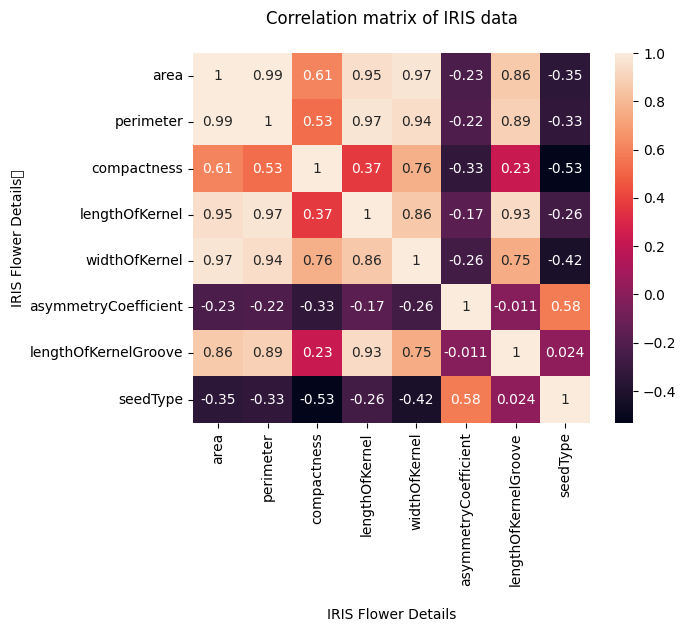

In [8]:
hm = sns.heatmap(dataset.corr(), annot = True)

hm.set(xlabel='\nIRIS Flower Details', ylabel='IRIS Flower Details\t', title = "Correlation matrix of IRIS data\n")

plt.show()

# 🧐Memilih Fitur Berdasarkan Correlation Matrix

In [3]:
# 7 fitur
features1 =['area','perimeter','compactness','lengthOfKernel','widthOfKernel','asymmetryCoefficient', 'lengthOfKernelGroove']

# 6 fitur
features2 =['area','perimeter','compactness','lengthOfKernel','widthOfKernel', 'lengthOfKernelGroove']

# 5 fitur
features3 =['area','perimeter','lengthOfKernel','widthOfKernel', 'lengthOfKernelGroove']

# 4 fitur
features4 =['area','perimeter','lengthOfKernel','widthOfKernel']

# 3 fitur
features5 =['area','perimeter','widthOfKernel']

# Memisahkan data fitur
x1 = dataset.loc[:, features1].values
x2 = dataset.loc[:, features2].values
x3 = dataset.loc[:, features3].values
x4 = dataset.loc[:, features4].values
x5 = dataset.loc[:, features5].values

# Memisahkan data kelas / label / target
y = dataset.loc[:, ['seedType']].values

# 👨‍🔬Proses PCA

In [4]:
#  Memproyeksikan data asli berdimensi 7 ke 3 dimensi
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x1)

# Membuat dataframe berisi data principal components yang terbentuk
principalDf = pd.DataFrame(data = principalComponents, columns = ['pc-1', 'pc-2', 'pc-3'])

# Menggabungkan dataframe principalDf dengan kolom 'Purchased' pada dataframe data
finalDf = pd.concat([principalDf, dataset[['seedType']]], axis = 1)

# Menampilkan dataframe hasil penggabungan
finalDf.head(5)

,pc-1,pc-2,pc-3,seedType
0,0.663448,-1.417321,0.041236,1
1,0.315667,-2.689229,0.231727,1
2,-0.660499,-1.131506,0.527087,1
3,-1.055276,-1.621190,0.437015,1
4,1.619999,-2.183384,0.333991,1


In [5]:
#  Memproyeksikan data asli berdimensi 6 ke 3 dimensi
pca2 = PCA(n_components=3)
principalComponents2 = pca2.fit_transform(x2)

# Membuat dataframe berisi data principal components yang terbentuk
principalDf2 = pd.DataFrame(data = principalComponents2, columns = ['pc-1', 'pc-2', 'pc-3'])

# Menggabungkan dataframe principalDf dengan kolom 'Purchased' pada dataframe data
finalDf2 = pd.concat([principalDf2, dataset[['seedType']]], axis = 1)

# Menampilkan dataframe hasil penggabungan
finalDf2.head(5)

,pc-1,pc-2,pc-3,seedType
0,0.478224,0.145524,0.233648,1
1,-0.027640,0.416212,0.206216,1
2,-0.795750,0.598979,0.002351,1
3,-1.250306,0.540725,0.025561,1
4,1.330794,0.479872,0.047232,1


In [6]:
#  Memproyeksikan data asli berdimensi 5 ke 3 dimensi
pca3 = PCA(n_components=3)
principalComponents3 = pca3.fit_transform(x3)

# Membuat dataframe berisi data principal components yang terbentuk
principalDf3 = pd.DataFrame(data = principalComponents3, columns = ['pc-1', 'pc-2', 'pc-3'])

# Menggabungkan dataframe principalDf dengan kolom 'Purchased' pada dataframe data
finalDf3 = pd.concat([principalDf3, dataset[['seedType']]], axis = 1)

# Menampilkan dataframe hasil penggabungan
finalDf3.head(5)

,pc-1,pc-2,pc-3,seedType
0,0.478228,0.146044,0.233352,1
1,-0.027684,0.416460,0.205467,1
2,-0.795903,0.597819,0.002091,1
3,-1.250423,0.539908,0.025216,1
4,1.330667,0.479160,0.046940,1


In [7]:
#  Memproyeksikan data asli berdimensi 4 ke 3 dimensi
pca4 = PCA(n_components=3)
principalComponents4 = pca4.fit_transform(x4)

# Membuat dataframe berisi data principal components yang terbentuk
principalDf4 = pd.DataFrame(data = principalComponents4, columns = ['pc-1', 'pc-2', 'pc-3'])

# Menggabungkan dataframe principalDf dengan kolom 'Purchased' pada dataframe data
finalDf4 = pd.concat([principalDf4, dataset[['seedType']]], axis = 1)

# Menampilkan dataframe hasil penggabungan
finalDf4.head(5)

,pc-1,pc-2,pc-3,seedType
0,0.507369,0.099831,0.015991,1
1,0.032157,-0.085062,0.051861,1
2,-0.725301,-0.352911,0.022982,1
3,-1.181173,-0.306528,-0.008585,1
4,1.373414,-0.246947,0.006479,1


In [8]:
#  Memproyeksikan data asli berdimensi 3 ke 3 dimensi
pca5 = PCA(n_components=3)
principalComponents5 = pca5.fit_transform(x5)

# Membuat dataframe berisi data principal components yang terbentuk
principalDf5 = pd.DataFrame(data = principalComponents5, columns = ['pc-1', 'pc-2', 'pc-3'])

# Menggabungkan dataframe principalDf dengan kolom 'Purchased' pada dataframe data
finalDf5 = pd.concat([principalDf5, dataset[['seedType']]], axis = 1)

# Menampilkan dataframe hasil penggabungan
finalDf5.head(5)

,pc-1,pc-2,pc-3,seedType
0,0.494009,0.073411,0.048525,1
1,0.042280,-0.043376,0.055091,1
2,-0.686995,-0.255137,0.012291,1
3,-1.151168,-0.272371,0.117222,1
4,1.381473,-0.194478,0.042047,1


# 📊 Visualisasi PCA 7 Fitur

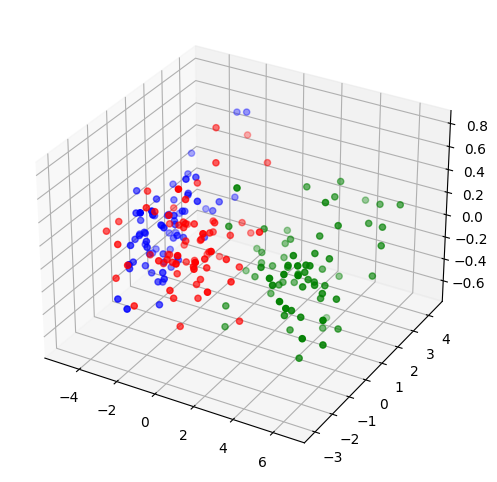

In [9]:
# Create figure and add axis
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')

ax.scatter(finalDf[finalDf["seedType"] == 1]['pc-1'],
          finalDf[finalDf["seedType"] == 1]['pc-2'],
          finalDf[finalDf["seedType"] == 1]['pc-3'],
          c = 'r')

ax.scatter(finalDf[finalDf["seedType"] == 2]['pc-1'],
          finalDf[finalDf["seedType"] == 2]['pc-2'],
          finalDf[finalDf["seedType"] == 2]['pc-3'],
          c = 'g')

ax.scatter(finalDf[finalDf["seedType"] == 3]['pc-1'],
          finalDf[finalDf["seedType"] == 3]['pc-2'],
          finalDf[finalDf["seedType"] == 3]['pc-3'],
          c = 'b')

# 📊 Visualisasi PCA 6 Fitur

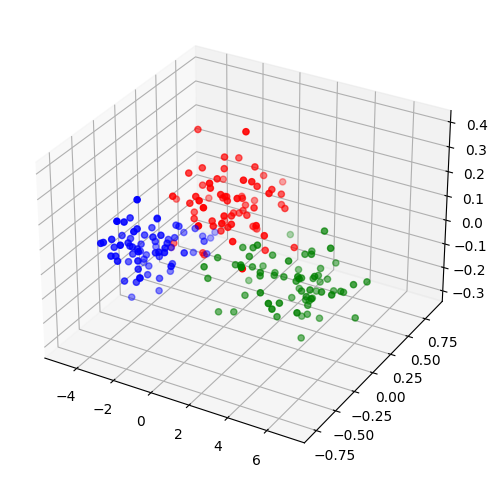

In [10]:
# Create figure and add axis
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')

ax.scatter(finalDf2[finalDf2["seedType"] == 1]['pc-1'],
          finalDf2[finalDf2["seedType"] == 1]['pc-2'],
          finalDf2[finalDf2["seedType"] == 1]['pc-3'],
          c = 'r')

ax.scatter(finalDf2[finalDf2["seedType"] == 2]['pc-1'],
          finalDf2[finalDf2["seedType"] == 2]['pc-2'],
          finalDf2[finalDf2["seedType"] == 2]['pc-3'],
          c = 'g')

ax.scatter(finalDf2[finalDf2["seedType"] == 3]['pc-1'],
          finalDf2[finalDf2["seedType"] == 3]['pc-2'],
          finalDf2[finalDf2["seedType"] == 3]['pc-3'],
          c = 'b')

# 📊 Visualisasi PCA 5 Fitur

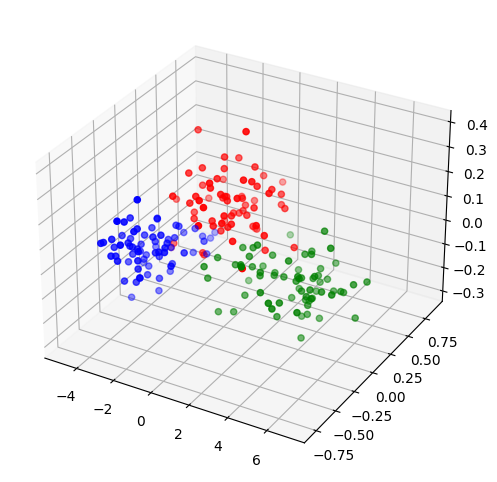

In [11]:
# Create figure and add axis
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')

ax.scatter(finalDf3[finalDf3["seedType"] == 1]['pc-1'],
          finalDf3[finalDf3["seedType"] == 1]['pc-2'],
          finalDf3[finalDf3["seedType"] == 1]['pc-3'],
          c = 'r')

ax.scatter(finalDf3[finalDf3["seedType"] == 2]['pc-1'],
          finalDf3[finalDf3["seedType"] == 2]['pc-2'],
          finalDf3[finalDf3["seedType"] == 2]['pc-3'],
          c = 'g')

ax.scatter(finalDf3[finalDf3["seedType"] == 3]['pc-1'],
          finalDf3[finalDf3["seedType"] == 3]['pc-2'],
          finalDf3[finalDf3["seedType"] == 3]['pc-3'],
          c = 'b')

# 📊 Visualisasi PCA 4 Fitur

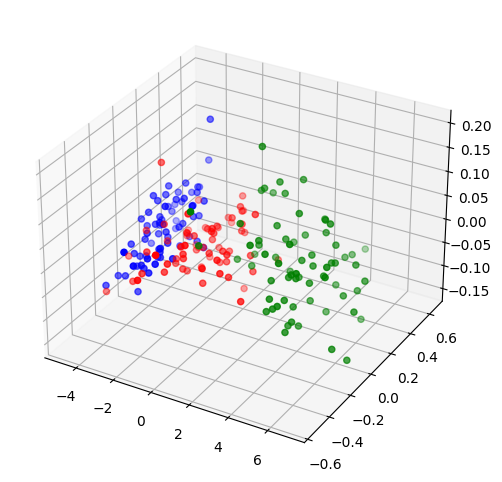

In [12]:
# Create figure and add axis
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')

ax.scatter(finalDf4[finalDf4["seedType"] == 1]['pc-1'],
          finalDf4[finalDf4["seedType"] == 1]['pc-2'],
          finalDf4[finalDf4["seedType"] == 1]['pc-3'],
          c = 'r')

ax.scatter(finalDf4[finalDf4["seedType"] == 2]['pc-1'],
          finalDf4[finalDf4["seedType"] == 2]['pc-2'],
          finalDf4[finalDf4["seedType"] == 2]['pc-3'],
          c = 'g')

ax.scatter(finalDf4[finalDf4["seedType"] == 3]['pc-1'],
          finalDf4[finalDf4["seedType"] == 3]['pc-2'],
          finalDf4[finalDf4["seedType"] == 3]['pc-3'],
          c = 'b')

# 📊 Visualisasi PCA 3 Fitur

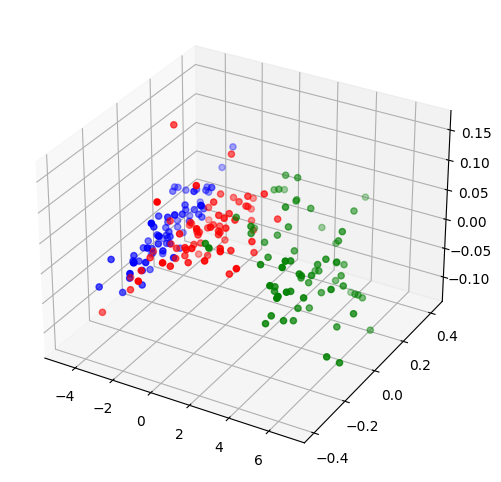

In [13]:
# Create figure and add axis
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')

ax.scatter(finalDf5[finalDf5["seedType"] == 1]['pc-1'],
          finalDf5[finalDf5["seedType"] == 1]['pc-2'],
          finalDf5[finalDf5["seedType"] == 1]['pc-3'],
          c = 'r')

ax.scatter(finalDf5[finalDf5["seedType"] == 2]['pc-1'],
          finalDf5[finalDf5["seedType"] == 2]['pc-2'],
          finalDf5[finalDf5["seedType"] == 2]['pc-3'],
          c = 'g')

ax.scatter(finalDf5[finalDf5["seedType"] == 3]['pc-1'],
          finalDf5[finalDf5["seedType"] == 3]['pc-2'],
          finalDf5[finalDf5["seedType"] == 3]['pc-3'],
          c = 'b')

## 🧱 Menyiapkan Data

In [14]:
Y1 = finalDf['seedType']                            # Pisahkan label
Y2 = finalDf2['seedType']                           # Pisahkan label
Y3 = finalDf3['seedType']                           # Pisahkan label
Y4 = finalDf4['seedType']                           # Pisahkan label
Y5 = finalDf5['seedType']                           # Pisahkan label

X1 = finalDf.iloc[:, [0, 1, 2]].values              # Pisahkan fitur
X2 = finalDf2.iloc[:, [0, 1, 2]].values             # Pisahkan fitur
X3 = finalDf3.iloc[:, [0, 1, 2]].values             # Pisahkan fitur
X4 = finalDf4.iloc[:, [0, 1, 2]].values             # Pisahkan fitur
X5 = finalDf5.iloc[:, [0, 1, 2]].values             # Pisahkan fitur

Y1 = np.array(Y1)                                   # Ubah dalam bentuk array
Y2 = np.array(Y2)                                   # Ubah dalam bentuk array
Y3 = np.array(Y3)                                   # Ubah dalam bentuk array
Y4 = np.array(Y4)                                   # Ubah dalam bentuk array
Y5 = np.array(Y5)                                   # Ubah dalam bentuk array

## 🔎 Mencari Nilai SSE (sum of the squared errors or deviations)

In [15]:
# Menyimpan nilai SSE untuk setiap k
SSE1 = []
SSE2 = []
SSE3 = []
SSE4 = []
SSE5 = []

SSE = [SSE1, SSE2, SSE3, SSE4, SSE5]

# Definisi nilai k -> 1-10
K = range(1,11)
nCoba = range(0, 5)

coba = ['7 fitur', '6 fitur', '5 fitur', '4 fitur', '3 fitur']
datax = [X1, X2, X3, X4, X5]

# Menghitung SSE
for i in nCoba:
    print(coba[i])
    
    for k in K:
      # Membuat model clustering
      kmeanModel = KMeans(n_clusters=k)

      # Fitting model dengan data
      kmeanModel.fit(datax[i])

      # Menghitung nilai SSE
      SSE[i].append(kmeanModel.inertia_)

      # Print nilai SSE
      if (k==1):
        print('k = %d \tSSE = %f \tDelta = %f' % (k, SSE[i][k-1], 0))
      else:
        print('k = %d \tSSE = %f \tDelta = %f' % (k, SSE[i][k-1], abs(SSE[i][k-2]-SSE[i][k-1])))
    
    print('\n')

7 fitur
k = 1 	SSE = 2716.250122 	Delta = 0.000000
k = 2 	SSE = 1008.135165 	Delta = 1708.114957
k = 3 	SSE = 584.078516 	Delta = 424.056649
k = 4 	SSE = 467.706313 	Delta = 116.372204
k = 5 	SSE = 382.393041 	Delta = 85.313272
k = 6 	SSE = 320.218605 	Delta = 62.174435
k = 7 	SSE = 276.479936 	Delta = 43.738670
k = 8 	SSE = 238.829883 	Delta = 37.650053
k = 9 	SSE = 212.963950 	Delta = 25.865933
k = 10 	SSE = 197.449721 	Delta = 15.514229


6 fitur
k = 1 	SSE = 2246.455341 	Delta = 0.000000
k = 2 	SSE = 545.316082 	Delta = 1701.139260
k = 3 	SSE = 220.187246 	Delta = 325.128835
k = 4 	SSE = 140.251396 	Delta = 79.935850
k = 5 	SSE = 102.279368 	Delta = 37.972029
k = 6 	SSE = 74.360878 	Delta = 27.918489
k = 7 	SSE = 55.535869 	Delta = 18.825010
k = 8 	SSE = 46.794435 	Delta = 8.741434
k = 9 	SSE = 39.552394 	Delta = 7.242041
k = 10 	SSE = 35.002076 	Delta = 4.550318


5 fitur
k = 1 	SSE = 2246.347552 	Delta = 0.000000
k = 2 	SSE = 545.231706 	Delta = 1701.115845
k = 3 	SSE = 220.12328

## 💪 Visualisasi Elbow Method

In [ ]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

C:\Users\Dimas\AppData\Local\Temp\ipykernel_1996\4103649060.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax1 = plt.subplot(grid[0, 0])
C:\Users\Dimas\AppData\Local\Temp\ipykernel_1996\4103649060.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax2 = plt.subplot(grid[0, 1])


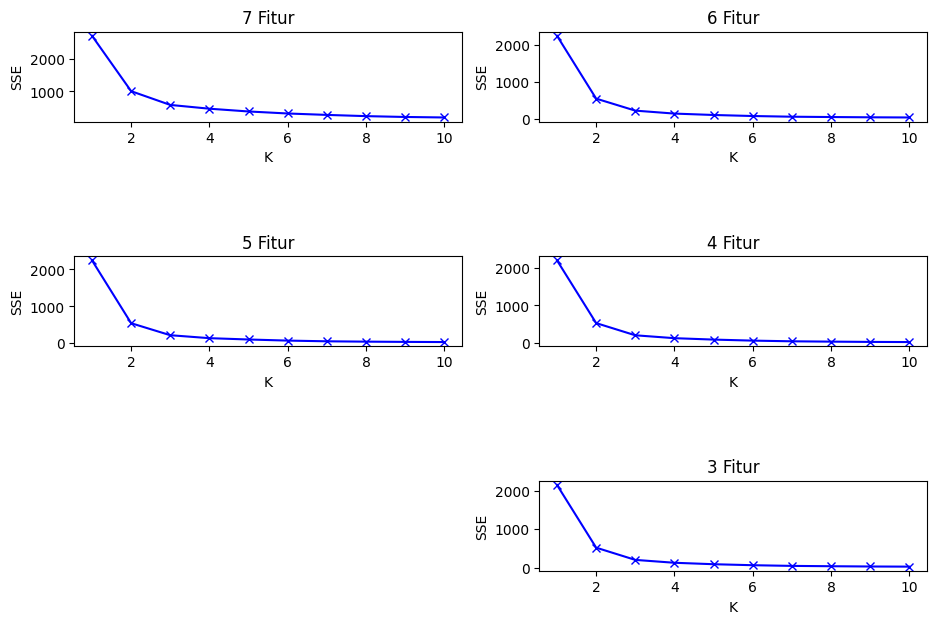

In [16]:
# Membuat Diagram Plotting SSE untuk Setiap K (Elbow)
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(nrows=1, ncols=5,figsize=(11, 7))

grid = plt.GridSpec(3, 2, wspace=0.2, hspace=1.5)

ax1 = plt.subplot(grid[0, 0])
ax2 = plt.subplot(grid[0, 1])
ax3 = plt.subplot(grid[1, 0])
ax4 = plt.subplot(grid[1, 1])
ax5 = plt.subplot(grid[2, 1])

ax1.plot(K, SSE1, 'bx-')
ax2.plot(K, SSE2, 'bx-')
ax3.plot(K, SSE3, 'bx-')
ax4.plot(K, SSE4, 'bx-')
ax5.plot(K, SSE5, 'bx-')

ax1.set_xlabel('K')
ax1.set_ylabel('SSE')

ax2.set_xlabel('K')
ax2.set_ylabel('SSE')

ax3.set_xlabel('K')
ax3.set_ylabel('SSE')

ax4.set_xlabel('K')
ax4.set_ylabel('SSE')

ax5.set_xlabel('K')
ax5.set_ylabel('SSE')

ax1.title.set_text('7 Fitur')
ax2.title.set_text('6 Fitur')
ax3.title.set_text('5 Fitur')
ax4.title.set_text('4 Fitur')
ax5.title.set_text('3 Fitur')

plt.show()

## 🔨 Melakukan Clustering dengan KMeans

In [17]:
# Melakukan Clustering yang akan fitting dengan input training data
kmeans1 = KMeans(n_clusters=3).fit(X1)
kmeans2 = KMeans(n_clusters=3).fit(X2)
kmeans3 = KMeans(n_clusters=3).fit(X3)
kmeans4 = KMeans(n_clusters=3).fit(X4)
kmeans5 = KMeans(n_clusters=3).fit(X5)

# Mendapatkan cluster labels
labels1 = kmeans1.labels_
labels2 = kmeans2.labels_
labels3 = kmeans3.labels_
labels4 = kmeans4.labels_
labels5 = kmeans5.labels_

# Mendapatkan nilai centroid
C1 = kmeans1.cluster_centers_
C2 = kmeans2.cluster_centers_
C3 = kmeans3.cluster_centers_
C4 = kmeans4.cluster_centers_
C5 = kmeans5.cluster_centers_

# Mencetak nilai centroid
centroid = [[1, C1[0], C1[1], C1[2]], [2, C2[0], C2[1], C2[2]], [3, C3[0], C3[1], C3[2]],
           [4, C4[0], C4[1], C4[2]], [5, C5[0], C5[1], C5[2]] ]
print(tabulate(centroid, headers = ['Model Ke', 'Centroid Cluster 0', 'Centroid Cluster 1', 'Centroid Cluster 2']))

  Model Ke  Centroid Cluster 0                     Centroid Cluster 1                     Centroid Cluster 2
----------  -------------------------------------  -------------------------------------  -------------------------------------
         1  [ 4.33639856  0.46609094 -0.05702452]  [-0.11491258 -1.08548863  0.10462753]  [-3.32787801  0.64576148 -0.05265826]
         2  [0.30909782 0.15516945 0.07010301]     [-3.14220901 -0.07269721 -0.03021827]  [ 4.58824604 -0.07685208 -0.03887301]
         3  [-3.14216365 -0.07261855 -0.03020154]  [ 4.58822387 -0.07673513 -0.03889328]  [0.30905772 0.15497421 0.070098  ]
         4  [ 4.53736105  0.01771044 -0.01154906]  [-3.12470405  0.0184906  -0.00849358]  [ 0.32785874 -0.03798171  0.02020794]
         5  [-3.09970664  0.01137318 -0.01423337]  [ 4.45925468  0.00822298 -0.02066881]  [ 0.29785396 -0.0216411   0.03575756]


C:\Users\Dimas\AppData\Local\Programs\Python\Python311\Lib\site-packages\tabulate\__init__.py:108: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  or (len(row) >= 2 and row[1] == SEPARATING_LINE)


## 📊 Visualisasi Hasil Clustering 7 Fitur

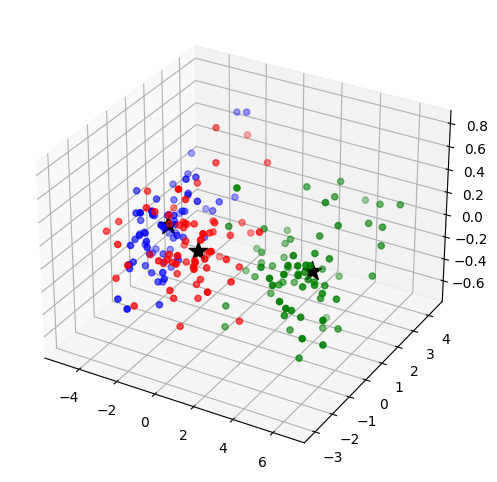

In [18]:
# Create figure and add axis
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')

ax.scatter(X1[Y1 == 1, 0], X1[Y1 == 1, 1], X1[Y1 == 1, 2], c='r')
ax.scatter(X1[Y1 == 2, 0], X1[Y1 == 2, 1], X1[Y1 == 2, 2], c='g')
ax.scatter(X1[Y1 == 3, 0], X1[Y1 == 3, 1], X1[Y1 == 3, 2], c='b')

ax.scatter(C1[0, 0], C1[0, 1], C1[0, 2], marker='*', s=200, c='black', label = 'cluster 0')
ax.scatter(C1[1, 0], C1[1, 1], C1[1, 2], marker='*', s=200, c='black', label = 'cluster 1')
ax.scatter(C1[2, 0], C1[2, 1], C1[2, 2], marker='*', s=200, c='black', label = 'cluster 2')

## 📊 Visualisasi Hasil Clustering 6 Fitur

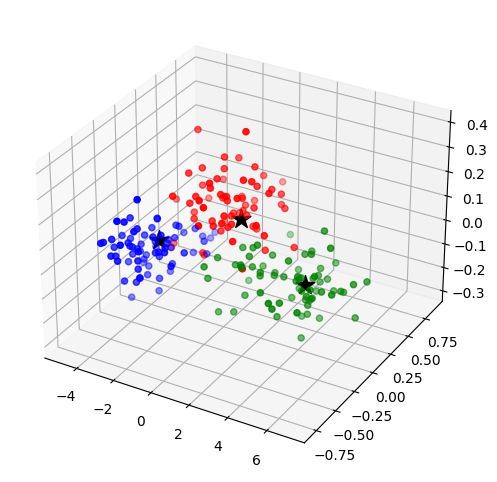

In [19]:
# Create figure and add axis
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')

ax.scatter(X2[Y2 == 1, 0], X2[Y2 == 1, 1], X2[Y2 == 1, 2], c='r')
ax.scatter(X2[Y2 == 2, 0], X2[Y2 == 2, 1], X2[Y2 == 2, 2], c='g')
ax.scatter(X2[Y2 == 3, 0], X2[Y2 == 3, 1], X2[Y2 == 3, 2], c='b')

ax.scatter(C2[0, 0], C2[0, 1], C2[0, 2], marker='*', s=200, c='black', label = 'cluster 0')
ax.scatter(C2[1, 0], C2[1, 1], C2[1, 2], marker='*', s=200, c='black', label = 'cluster 1')
ax.scatter(C2[2, 0], C2[2, 1], C2[2, 2], marker='*', s=200, c='black', label = 'cluster 2')

## 📊 Visualisasi Hasil Clustering 5 Fitur

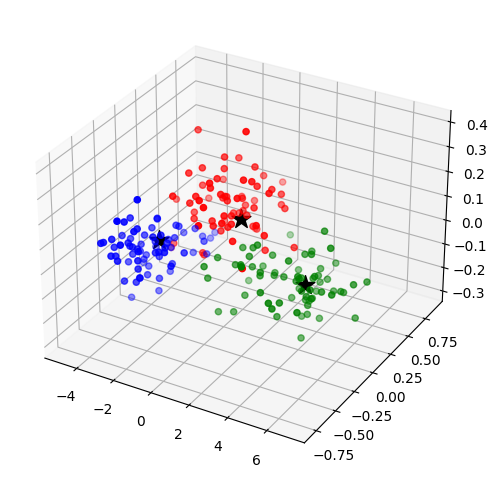

In [20]:
# Create figure and add axis
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')

ax.scatter(X3[Y3 == 1, 0], X3[Y3 == 1, 1], X3[Y3 == 1, 2], c='r')
ax.scatter(X3[Y3 == 2, 0], X3[Y3 == 2, 1], X3[Y3 == 2, 2], c='g')
ax.scatter(X3[Y3 == 3, 0], X3[Y3 == 3, 1], X3[Y3 == 3, 2], c='b')

ax.scatter(C3[0, 0], C3[0, 1], C3[0, 2], marker='*', s=200, c='black', label = 'cluster 0')
ax.scatter(C3[1, 0], C3[1, 1], C3[1, 2], marker='*', s=200, c='black', label = 'cluster 1')
ax.scatter(C3[2, 0], C3[2, 1], C3[2, 2], marker='*', s=200, c='black', label = 'cluster 2')

## 📊 Visualisasi Hasil Clustering 4 Fitur

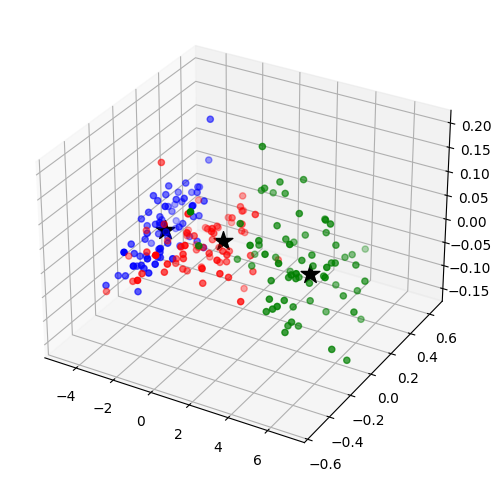

In [21]:
# Create figure and add axis
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')

ax.scatter(X4[Y4 == 1, 0], X4[Y4 == 1, 1], X4[Y4 == 1, 2], c='r')
ax.scatter(X4[Y4 == 2, 0], X4[Y4 == 2, 1], X4[Y4 == 2, 2], c='g')
ax.scatter(X4[Y4 == 3, 0], X4[Y4 == 3, 1], X4[Y4 == 3, 2], c='b')

ax.scatter(C4[0, 0], C4[0, 1], C4[0, 2], marker='*', s=200, c='black', label = 'cluster 0')
ax.scatter(C4[1, 0], C4[1, 1], C4[1, 2], marker='*', s=200, c='black', label = 'cluster 1')
ax.scatter(C4[2, 0], C4[2, 1], C4[2, 2], marker='*', s=200, c='black', label = 'cluster 2')

## 📊 Visualisasi Hasil Clustering 3 Fitur

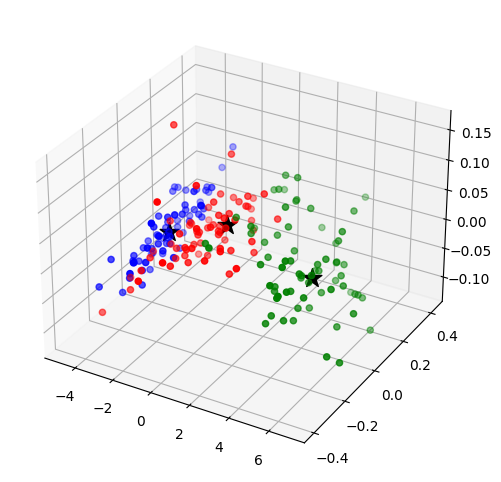

In [22]:
# Create figure and add axis
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, projection='3d')

ax.scatter(X5[Y5 == 1, 0], X5[Y5 == 1, 1], X5[Y5 == 1, 2], c='r')
ax.scatter(X5[Y5 == 2, 0], X5[Y5 == 2, 1], X5[Y5 == 2, 2], c='g')
ax.scatter(X5[Y5 == 3, 0], X5[Y5 == 3, 1], X5[Y5 == 3, 2], c='b')

ax.scatter(C5[0, 0], C5[0, 1], C5[0, 2], marker='*', s=200, c='black', label = 'cluster 0')
ax.scatter(C5[1, 0], C5[1, 1], C5[1, 2], marker='*', s=200, c='black', label = 'cluster 1')
ax.scatter(C5[2, 0], C5[2, 1], C5[2, 2], marker='*', s=200, c='black', label = 'cluster 2')

## 🎯 Menghitung Nilai Silhoutte
- Nilai silhoutte dari rentang -1 hingga 1
- Nilai terbaik adalah 1
- Nilai >0.5 dapat dikatakan bagus

In [23]:
# Evaluasi silhoutte value
print('Model 1 (7 Fitur): ', silhouette_score(X1, labels1))
print('Model 2 (6 Fitur): ', silhouette_score(X2, labels2))
print('Model 3 (5 Fitur): ', silhouette_score(X3, labels3))
print('Model 4 (4 Fitur): ', silhouette_score(X4, labels4))
print('Model 5 (3 Fitur): ', silhouette_score(X5, labels5))

Model 1 (7 Fitur):  0.4734817840643168
Model 2 (6 Fitur):  0.6120011321263854
Model 3 (5 Fitur):  0.6120730158875243
Model 4 (4 Fitur):  0.6242371434910087
Model 5 (3 Fitur):  0.6291674145872909


## 🎯 Menghitung Nilai Davies–Bouldin index (DB Index)
- Nilai minimum dan nilai terbaik adalah 0

In [24]:
print('Model 1 (7 Fitur): ', davies_bouldin_score(X1, labels1))
print('Model 2 (6 Fitur): ', davies_bouldin_score(X2, labels2))
print('Model 3 (5 Fitur): ', davies_bouldin_score(X3, labels3))
print('Model 4 (4 Fitur): ', davies_bouldin_score(X4, labels4))
print('Model 5 (3 Fitur): ', davies_bouldin_score(X5, labels5))

Model 1 (7 Fitur):  0.7503045715382575
Model 2 (6 Fitur):  0.4910920621773296
Model 3 (5 Fitur):  0.4909884375058999
Model 4 (4 Fitur):  0.47135651571151965
Model 5 (3 Fitur):  0.4631487090161963


## 🚨 Model yang Akan Dipakai 🚨 
- Model 3 dengan 5 fitur yang digunakan dengan alasan lebih banyak fitur yang dipakai, nilai silhoutte bagus, dan dari visualisasi 3D lebih terlihat teratur

In [25]:
print(labels3)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 0 2 0 0 2 2 2 2 2 2
 2 2 2 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 2 2 2 0 1 2 1 1
 2 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 1 1 2 2 2 2 1 2 2 2 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


## 🔬 Prediksi Sebuah Data

In [27]:
steps = [('pca', pca3), ('m', kmeans3)]
fixmodel = Pipeline(steps=steps)

# make prediction
row = np.array([np.array([15.26, 14.84, 5.763, 3.312, 5.22])]) # REAL LABEL = 1 (KAMA)
yhat = fixmodel.predict(row)
print('Predicted Class: %d' % yhat[0], '\n')


row = np.array([np.array([18.3, 15.89, 5.979, 3.755, 5.962])]) # REAL LABEL = 2 (ROSA)
yhat = fixmodel.predict(row)
print('Predicted Class: %d' % yhat[0], '\n')


row = np.array([np.array([10.91, 12.8, 5.088, 2.675, 4.956])]) # REAL LABEL = 3 (CANADIAN)
yhat = fixmodel.predict(row)
print('Predicted Class: %d' % yhat[0], '\n')

Predicted Class: 2 

Predicted Class: 1 

Predicted Class: 0 



# 🚨 Export Model 

## 🚚 Export Model untuk Dipakai di Website

In [28]:
# Hasil dump akan tampil jika dilakukan lewat Jupyter Notebook
filename='rev_model.pkl'
pickle.dump(fixmodel, open(filename,'wb'))

## 🛸 Cara Alternatif Export Model (Khusus Colab) - Restricted 🚧

In [ ]:
# Jika dilakukan lewat Google Colab
# import gc
# import pickle
# from google.colab import drive
# drive.mount('/content/drive', force_remount=True)

# Export Pickle File
# pick_insert = open('drive/My Drive/data.pickle','wb')
# pickle.dump(data, pick_insert)
# pick_insert.close()

# Import Pickle File (Tidak perlu dipakai)
# pick_read = open('drive/My Drive/data.pickle','rb')
# data = pickle.load(pick_read)
# pick_read.close()

# 🏁 **SELESAI** 🏁